In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
#load the dataset 
df= pd.read_csv('/kaggle/input/electric-vehicle-population/Electric_Vehicle_Population_Data.csv')

#set display option
pd.set_option('display.max_columns',None)

df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150477,WBY43AW05P,Grays Harbor,Montesano,WA,98563.0,2023,BMW,I4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,19.0,251204075,POINT (-123.60535 46.982215),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF G...,5.302700e+10
150478,5YJ3E1EB7P,King,Seattle,WA,98104.0,2023,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,241344414,POINT (-122.329075 47.6018),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150479,5YJYGDEEXM,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,43.0,180705626,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
150480,5UXTA6C08P,Snohomish,Mountlake Terrace,WA,98043.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,240473950,POINT (-122.30842 47.78416),PUGET SOUND ENERGY INC,5.306105e+10


In [3]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['vin_(1-10)', 'county', 'city', 'state', 'postal_code', 'model_year',
       'make', 'model', 'electric_vehicle_type',
       'clean_alternative_fuel_vehicle_(cafv)_eligibility', 'electric_range',
       'base_msrp', 'legislative_district', 'dol_vehicle_id',
       'vehicle_location', 'electric_utility', '2020_census_tract'],
      dtype='object')

Data Cleaning And Validation

In [4]:
#check for null value and dealing with null values 
null_values = df.isnull().sum()


#dropping all null values 
df.dropna(inplace=True)
null_values

vin_(1-10)                                             0
county                                                 3
city                                                   3
state                                                  0
postal_code                                            3
model_year                                             0
make                                                   0
model                                                  0
electric_vehicle_type                                  0
clean_alternative_fuel_vehicle_(cafv)_eligibility      0
electric_range                                         0
base_msrp                                              0
legislative_district                                 341
dol_vehicle_id                                         0
vehicle_location                                       7
electric_utility                                       3
2020_census_tract                                      3
dtype: int64

In [5]:
#Check for duplicated rows 
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

Data Exploration

In [6]:
#check the first 10 rows of the dataframe
df.head(10)

,vin_(1-10),county,city,state,postal_code,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,KM8K33AGXL,King,Seattle,WA,98103.0,2020,HYUNDAI,KONA,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,258,0,43.0,249675142,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,1C4RJYB61N,King,Bothell,WA,98011.0,2022,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,1.0,233928502,POINT (-122.20578 47.762405),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,1C4RJYD61P,Yakima,Yakima,WA,98908.0,2023,JEEP,GRAND CHEROKEE,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,14.0,229675939,POINT (-120.6027202 46.5965625),PACIFICORP,5.307700e+10
3,5YJ3E1EA7J,King,Kirkland,WA,98034.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,45.0,104714466,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,WBY7Z8C5XJ,Thurston,Olympia,WA,98501.0,2018,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,22.0,185498386,POINT (-122.89692 47.043535),PUGET SOUND ENERGY INC,5.306701e+10
5,5YJ3E1EAXL,Snohomish,Marysville,WA,98271.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,266,0,38.0,124595523,POINT (-122.1713847 48.10433),PUGET SOUND ENERGY INC,5.306194e+10
6,2C4RC1N77H,King,Kent,WA,98042.0,2017,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,33,0,47.0,1815593,POINT (-122.111625 47.36078),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
7,5YJYGDEE3L,King,Woodinville,WA,98072.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,45.0,124760555,POINT (-122.151665 47.75855),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
8,5YJ3E1EA1J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,125048003,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
9,7SAYGDEF0P,King,Bellevue,WA,98004.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,240416207,POINT (-122.201905 47.61385),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


Descriptive Statistics 

In [7]:
#Explore the structure of the data
structure = df.info()
structure

<class 'pandas.core.frame.DataFrame'>
Index: 150137 entries, 0 to 150481
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   vin_(1-10)                                         150137 non-null  object 
 1   county                                             150137 non-null  object 
 2   city                                               150137 non-null  object 
 3   state                                              150137 non-null  object 
 4   postal_code                                        150137 non-null  float64
 5   model_year                                         150137 non-null  int64  
 6   make                                               150137 non-null  object 
 7   model                                              150137 non-null  object 
 8   electric_vehicle_type                              150137 non-null  object 
 9 

In [8]:
#calculative summary statistics for numeric columns 
numeric_summary = df.describe()
numeric_summary

,postal_code,model_year,electric_range,base_msrp,legislative_district,dol_vehicle_id,2020_census_tract
count,150137.000000,150137.000000,150137.000000,150137.000000,150137.000000,1.501370e+05,1.501370e+05
mean,98257.884406,2020.007040,67.863978,1311.100961,29.344226,2.111399e+08,5.303968e+10
std,301.505834,3.015218,96.224883,9224.342308,14.824931,8.196455e+07,1.615372e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.693919e+08,5.303301e+10
50%,98122.000000,2021.000000,18.000000,0.000000,33.000000,2.150583e+08,5.303303e+10
75%,98370.000000,2023.000000,97.000000,0.000000,43.000000,2.399286e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


Data Distribution

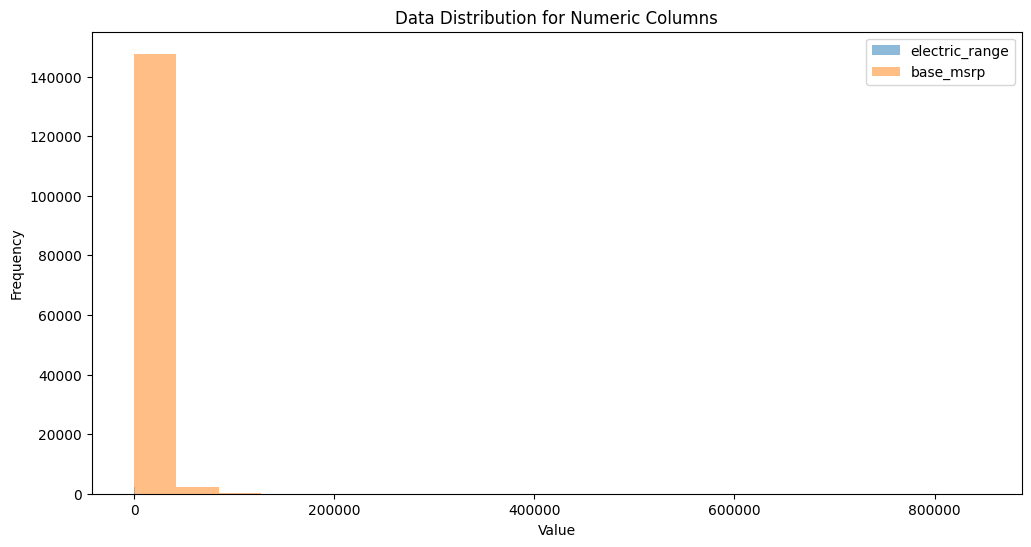

In [9]:
# Create histograms for numeric columns to visualize data distribution
numeric_columns = ['electric_range', 'base_msrp']

# Set the figure size
plt.figure(figsize=(12, 6))

# Create histograms for each numeric column
for col in numeric_columns:
    plt.hist(df[col], bins=20, alpha=0.5, label=col)

# Set labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Data Distribution for Numeric Columns')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Correlations

In [10]:
# Calculate and visualize correlation coefficients between numeric columns
correlation_matrix = df[numeric_columns].corr()
correlation_matrix


,electric_range,base_msrp
electric_range,1.000000,0.103834
base_msrp,0.103834,1.000000


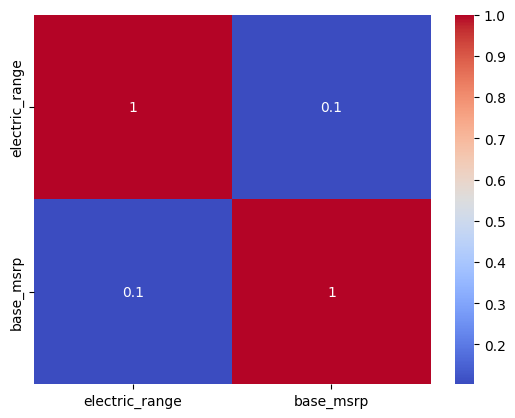

In [11]:
# Create a heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Categorical Analysis

In [12]:
# Analyze the distribution of categories in a categorical column
category_counts = df['electric_vehicle_type'].value_counts()
category_counts


electric_vehicle_type
Battery Electric Vehicle (BEV)            116583
Plug-in Hybrid Electric Vehicle (PHEV)     33554
Name: count, dtype: int64

In [13]:
# Display the percentages
category_percentages = df['electric_vehicle_type'].value_counts(normalize=True) * 100
category_percentages

electric_vehicle_type
Battery Electric Vehicle (BEV)            77.651079
Plug-in Hybrid Electric Vehicle (PHEV)    22.348921
Name: proportion, dtype: float64

Segmentation Analysis

In [14]:
# Segment the data by 'State' and calculate statistics for each segment
state_segments = df.groupby('state')[numeric_columns].mean()
state_segments

,electric_range,base_msrp
state,,
WA,67.863978,1311.100961


# Insights 

## Vehicle Distribution by Type:
The dataset predominantly consists of Battery Electric Vehicles (BEVs) with approximately 77.65% of the total count. This indicates a substantial preference for all-electric vehicles in the market.

Plug-in Hybrid Electric Vehicles (PHEVs) account for approximately 22.35% of the total count. While not as prevalent as BEVs, PHEVs still represent a significant portion of the market.

## Correlation Analysis:
A correlation analysis between 'electric_range' and 'base_msrp' was conducted, revealing a weak positive correlation (0.103834) between these two variables. This correlation suggests that, on average, vehicles with higher electric ranges tend to have slightly higher base prices.

## Segmentation by State (Washington, 'WA'):
The analysis included a segmentation of the dataset by the state of Washington ('WA'). Within this region:

The average electric range of electric vehicles is approximately 67.86 miles, indicating that vehicles in this area typically offer a reasonable electric driving range.

The average base Manufacturer's Suggested Retail Price (MSRP) for electric vehicles is approximately $1,311.10. 
This information can be valuable for consumers and industry stakeholders in Washington who want to gauge the expected costs of electric vehicles.



# Comment
The analysis revealed valuable insights into the electric vehicle population dataset. Notably, the data predominantly represents Battery Electric Vehicles (BEVs) compared to Plug-in Hybrid Electric Vehicles (PHEVs), indicating a preference for all-electric solutions.

Furthermore, the correlation analysis uncovered a modest positive correlation between the electric range and the base Manufacturer's Suggested Retail Price (MSRP), hinting that, on average, higher electric ranges are associated with slightly higher prices.

The segmentation analysis by the state of Washington ('WA') provided an understanding of the mean electric range and average base MSRP for electric vehicles within the region. This knowledge can be particularly useful for policymakers and stakeholders in the electric vehicle industry.


# Conclusion
The analysis highlights a strong preference for Battery Electric Vehicles (BEVs) in the market, with BEVs representing approximately 77.65% of the dataset. Plug-in Hybrid Electric Vehicles (PHEVs) also play a significant role, comprising about 22.35% of the dataset. The correlation between electric range and base pricing is modest but suggests that longer electric ranges are associated with slightly higher prices. Insights specific to Washington ('WA') indicate an average electric range of approximately 67.86 miles and an average base MSRP of approximately $1,311.10. These insights form a foundation for informed decision-making and further exploration of the electric vehicle market's dynamics.





